<hr>
<div align="center">
<font size="8">
  <b>Chorus of Prototypes</b> 
</font><br>
This notebook the experiments of the Chorus of Prototypes paper on the IRIS dataset. <br>
Paper: <a>https://www.frontiersin.org/articles/10.3389/fncom.2012.00045/full</a>
</div>
<hr>

# __Iris dataset__

In [22]:
import pandas as pd
from sklearn import datasets
import os

# import some data to play with
iris = datasets.load_iris()
data = pd.DataFrame(iris.data,columns = iris.feature_names)

# or

iris = data = pd.read_csv(os.path.abspath("../data/Iris.csv"))

## Data preview

In [19]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Data analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=iris["Species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


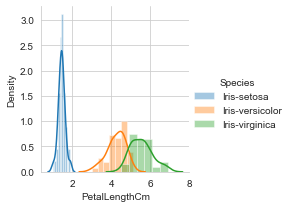

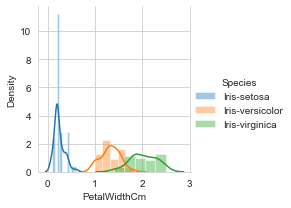

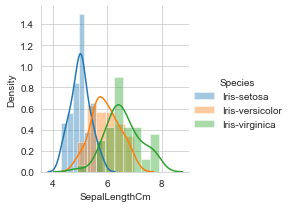

In [ ]:
sns.FacetGrid(iris,hue="Species",size=3).map(sns.distplot,"PetalLengthCm").add_legend()
sns.FacetGrid(iris,hue="Species",size=3).map(sns.distplot,"PetalWidthCm").add_legend()
sns.FacetGrid(iris,hue="Species",size=3).map(sns.distplot,"SepalLengthCm",ax=axes[2]).add_legend()
plt.show()

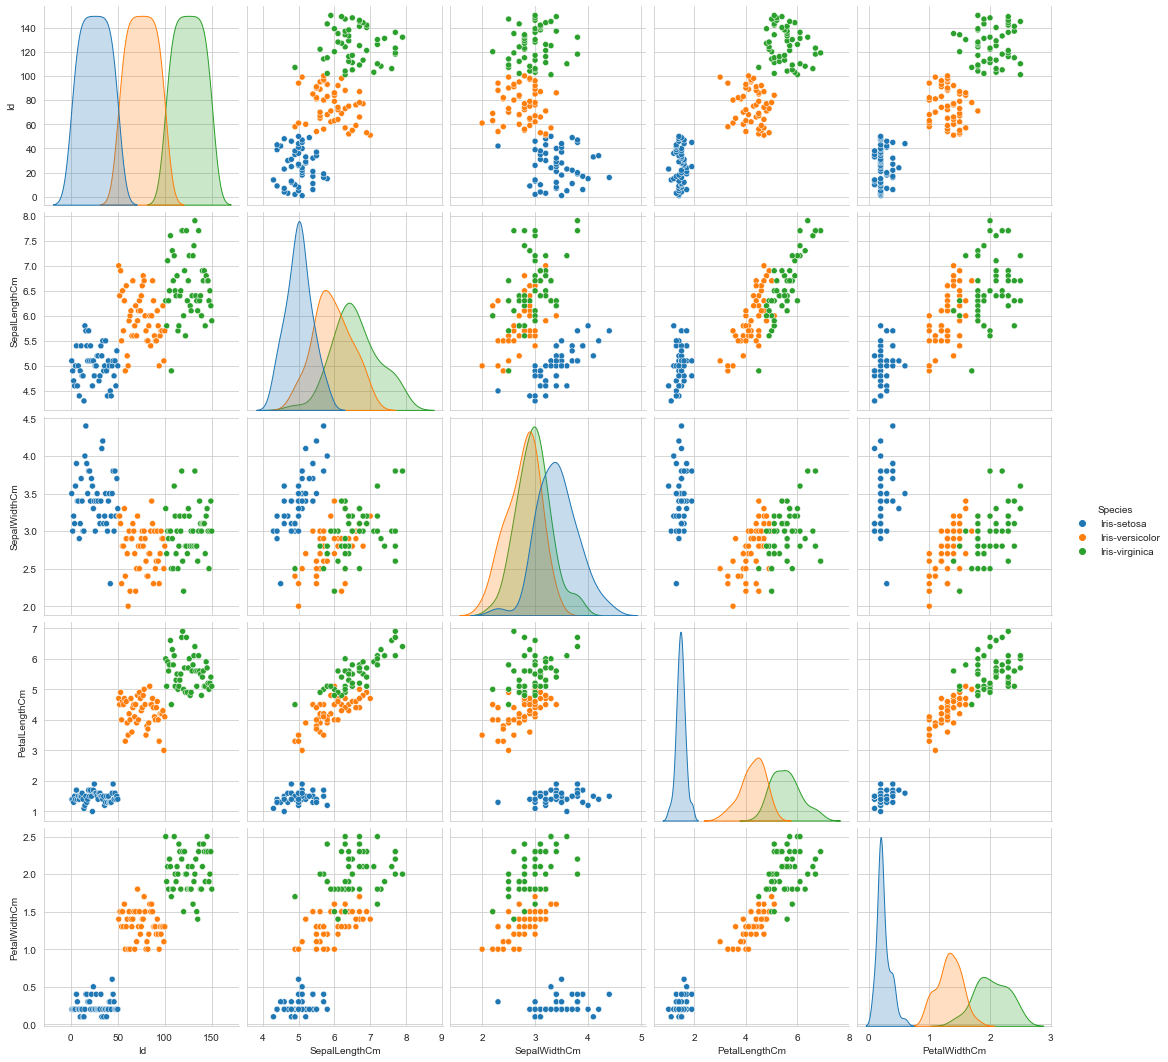

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="Species",size=3);
plt.show()

# K-Means on Iris

In [45]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []
x = iris.iloc[:, [0, 1, 2, 3]].values

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

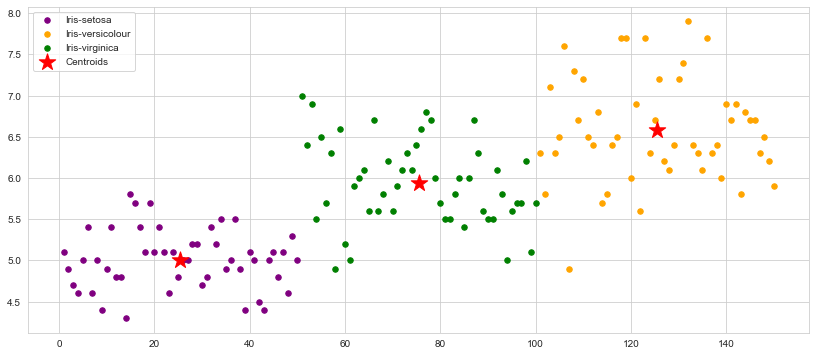

In [68]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

#Visualising the clusters
plt.figure(figsize=(14,6))

s = 30
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = s, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = s, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = s, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 10*s, c = 'red', label = 'Centroids', marker='*')

plt.legend()